In [0]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Analyzing Impact of COVID-19 on Suicide Rates in Canada
Unfortunately, one of the consequences of self-isolation and social distancing is an increase in loneliness. One of the potential consequences of this is an increase in suicides across Canada.

Using data from https://www.suicideinfo.ca/resource/suicide-stats-canada-provinces/ as well as data from https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html on the total cases of covid19 across canada, I hope to correlate potential increases in suicide rates with COVID-19


### Looking at COVID Case in Canada and it's provinces and territories

In [0]:
#Import COVID Dataset
covid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/canada_covid19.csv')
covid.head()

pruid            prname  ... percentoday ratetotal
0     35           Ontario  ...       300.0     0.021
1     59  British Columbia  ...       100.0     0.020
2      1            Canada  ...       400.0     0.011
3     35           Ontario  ...         0.0     0.021
4     59  British Columbia  ...       300.0     0.079

[5 rows x 15 columns]

In [0]:
#Lets check out the date column, and change to datetime64 if needed
print(covid.date.dtype)


object


In [0]:
#Convert date to datetime and set it as the index
covid.date = pd.to_datetime(covid.date, dayfirst=True)
covid = covid.set_index('date')
covid.head()

pruid            prname  ... percentoday  ratetotal
date                                 ...                       
2020-01-31     35           Ontario  ...       300.0      0.021
2020-01-31     59  British Columbia  ...       100.0      0.020
2020-01-31      1            Canada  ...       400.0      0.011
2020-02-08     35           Ontario  ...         0.0      0.021
2020-02-08     59  British Columbia  ...       300.0      0.079

[5 rows x 14 columns]

In [0]:
#I'll drop the french province name, the province id and just keep the number of deaths and total number
covid = covid.loc[:,['prname','numdeaths','numtotal']]
covid.head()

prname  numdeaths  numtotal
date                                             
2020-01-31           Ontario        0.0         3
2020-01-31  British Columbia        0.0         1
2020-01-31            Canada        0.0         4
2020-02-08           Ontario        0.0         3
2020-02-08  British Columbia        0.0         4

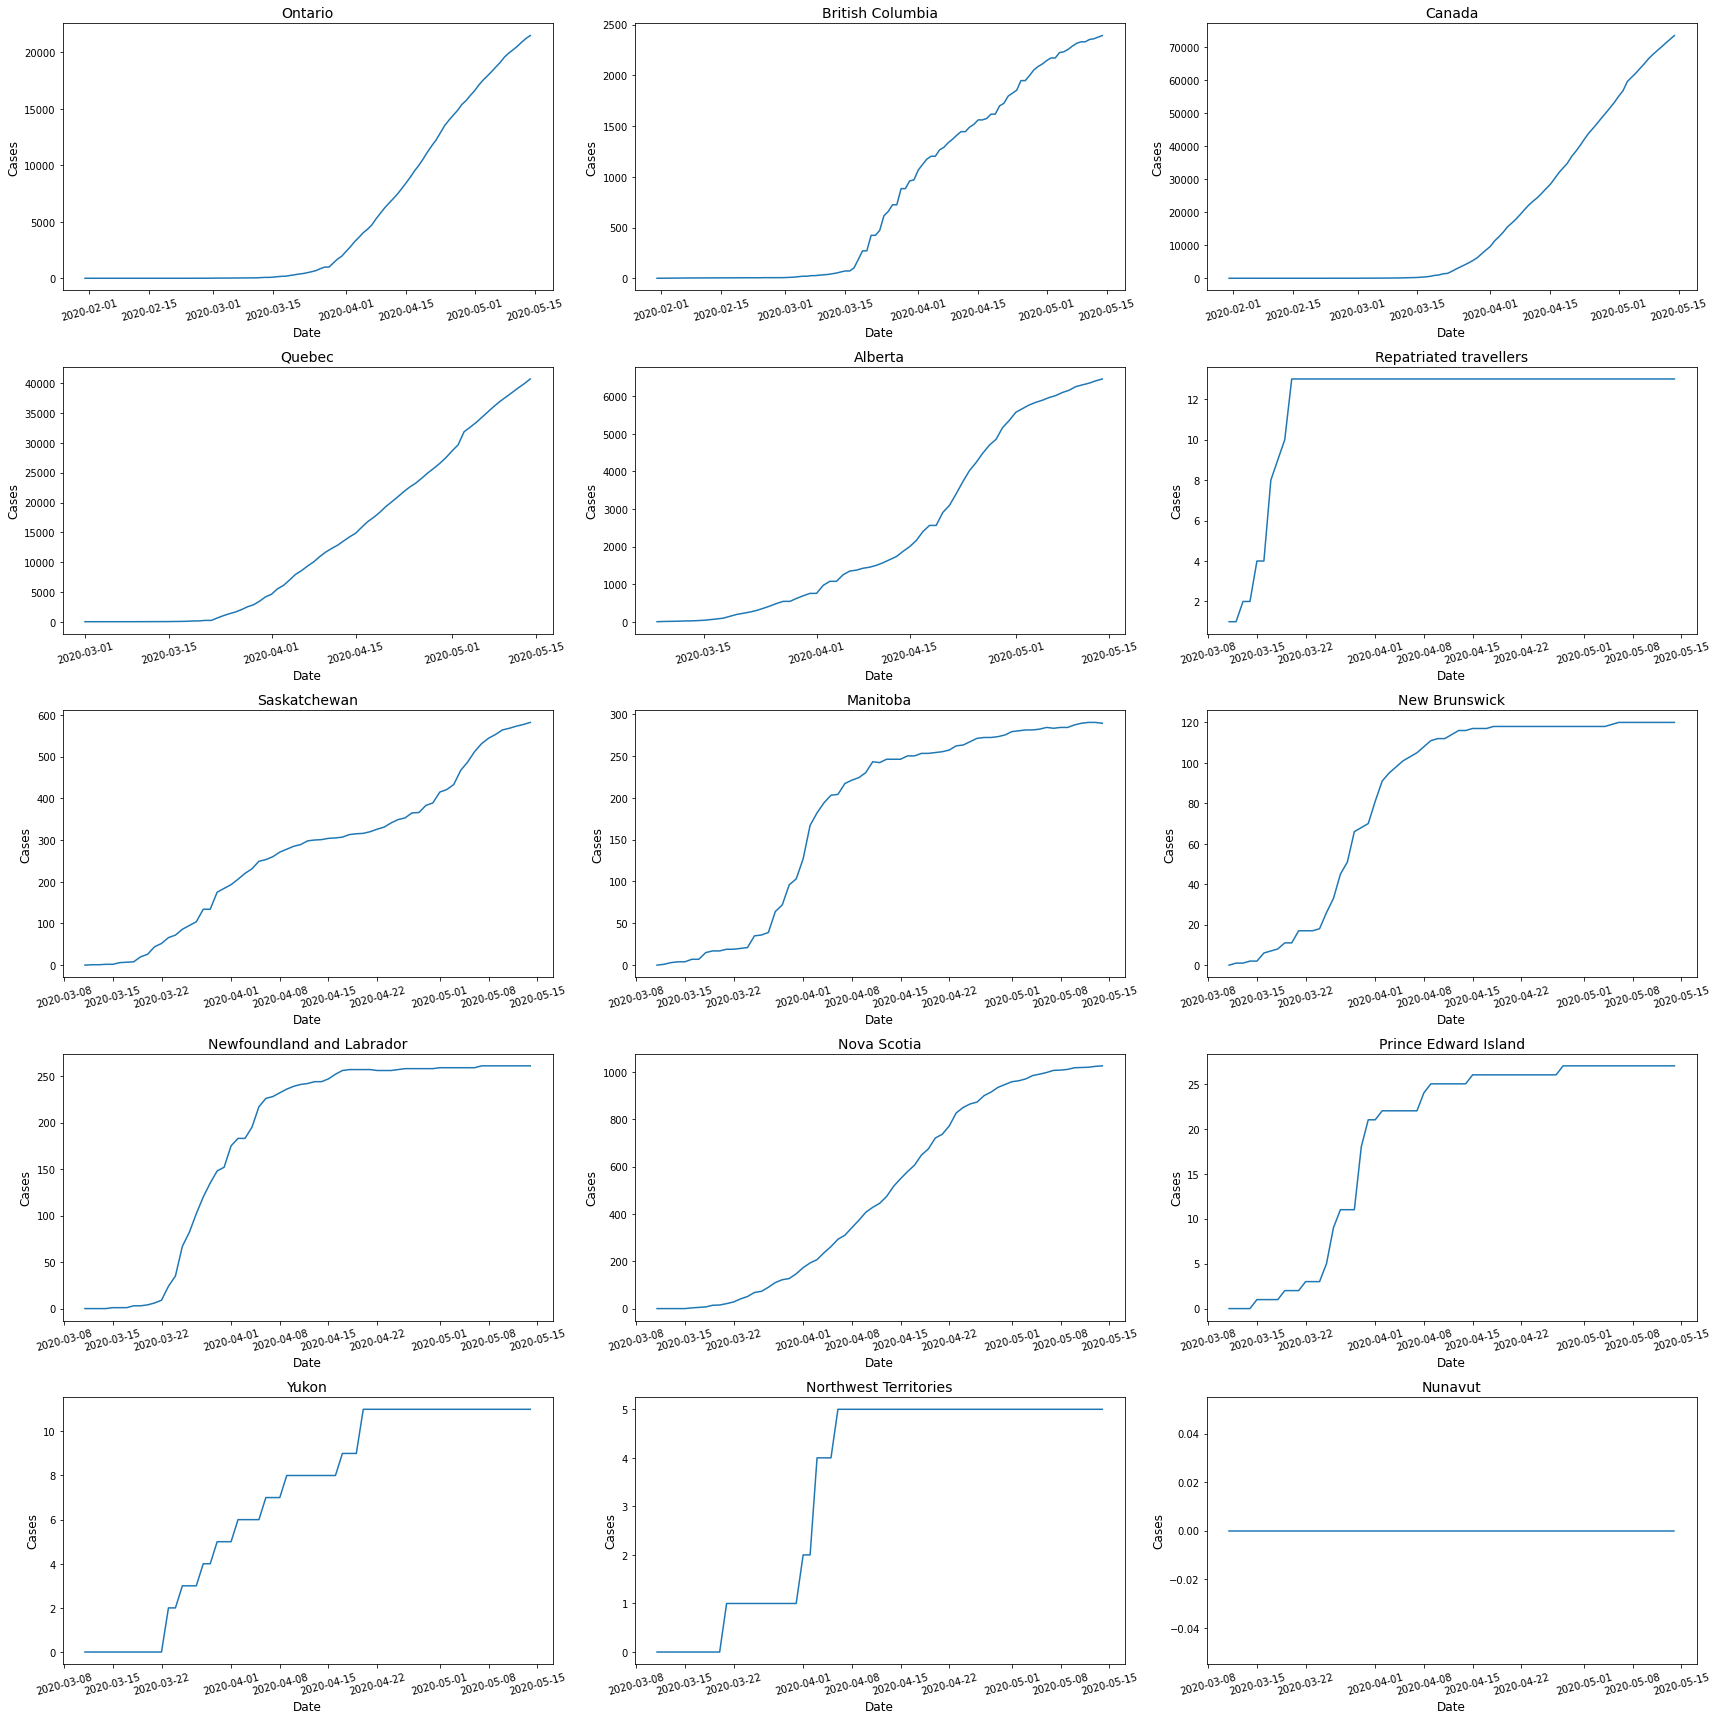

In [0]:
#Programmatically plot each province's case vs time plot
num_pr = len(covid.prname.unique())

#Get widht and height dimensions for plotting
gs_w = int(num_pr**(0.5))
gs_h = int(num_pr/gs_w)

#There's probaby a much better way of doing this
while gs_h*gs_w < num_pr:
  gs_h += 1
assert gs_w*gs_h >= num_pr, 'Expected %i, but got %ix%i' %(num_pr, gs_w, gs_h)


fig, ax = plt.subplots(gs_h,gs_w)
fig.set_size_inches(24,24)
fig.set_facecolor('w')
#fig.tight_layout()

#plt.subplots_adjust(hspace=0.3,wspace=0.2)

r = 0
c = 0

for i,pr in enumerate(covid.prname.unique()):
  ax[r,c].plot(covid[covid.prname==pr].numtotal)
  ax[r,c].set_title('%s' %(pr), fontsize=14)

  #Canvas needs to be drawn first for some reason
  fig.canvas.draw()
  xlabels = ax[r,c].get_xticklabels()
  ax[r,c].set_xticklabels(xlabels, rotation=15)

  ax[r,c].set_xlabel('Date', fontsize=12)
  ax[r,c].set_ylabel('Cases', fontsize=12)

  c+=1
  if c == gs_w:
    r+=1
    c=0
fig.tight_layout()
plt.show()



So we see that besides the provinces and territories we also have Canada as a whole and repatriated travellers. Also, Nunavut has seen no cases, so it'll be interesting to see if there is as large an increase as the others, or maybe just the fact that social distancing was implemented.

### Looking at Suicide Rates in Canada

In [0]:
#Import the dataset, note that it is in .xlsx format
suicide = pd.read_excel('/content/drive/My Drive/Colab Notebooks/suicide_stats_canada.xlsx')
suicide.sample(100)

ValueError: ignored